In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.use('agg')
import os
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.insert(1,'/home/arya/workspace/bio/CLEAR/')# path to CLEAR project
from sklearn.metrics.pairwise import rbf_kernel as rbf
import pandas as pd
pd.options.display.max_rows = 20;
import CLEAR.Libs.Markov as mkv
pd.options.display.max_columns = 50;
pd.options.display.expand_frame_repr = True
from IPython.display import display
mpl.rcParams['figure.dpi'] = 120
import pylab as plt
# import Utils.Simulation as sim
T=np.arange(0,101,10)
def intIndex(x):
    x.index=x.index.astype(int)
    x.columns=x.columns.astype(int)
    return x

# Loading Data

,1,2,3,4,5,6,7,8,9,10
GEN,,,,,,,,,,
0,0.050,0.0500,0.0500,0.050,0.0500,0.0500,0.0500,0.0500,0.0500,0.050
1,0.075,0.0750,0.0550,0.095,0.1100,0.0925,0.0875,0.0650,0.0850,0.125
2,0.140,0.1125,0.1150,0.150,0.2125,0.1325,0.1575,0.1000,0.1500,0.180
3,0.190,0.1850,0.1850,0.235,0.2725,0.2100,0.2325,0.1700,0.1850,0.220
4,0.280,0.2700,0.2425,0.320,0.3650,0.2825,0.3125,0.2875,0.2575,0.270


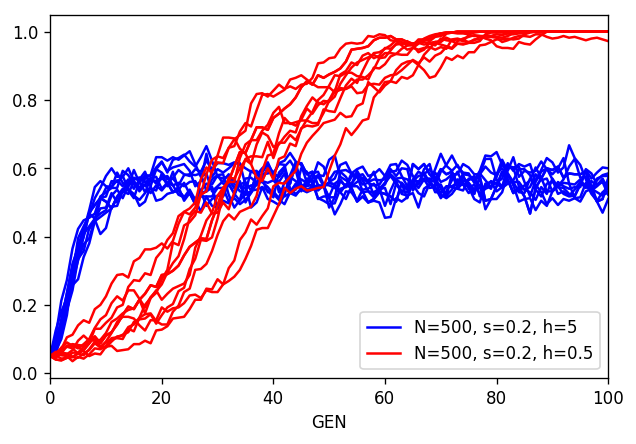

In [3]:
try:
    a=intIndex(pd.read_csv('overdominace.tsv',sep='\t',index_col=0))
    b=intIndex(pd.read_csv('directional.tsv',sep='\t',index_col=0))
except:
    K=10
    a=intIndex(pd.concat([sim.Simulation.simulateSingleLoci(nu0=0.05, T=100, s=.2, N=200,verbose=True,h=5) for i in range(K)],1,keys=np.arange(K)+1))
    b=intIndex(pd.concat([sim.Simulation.simulateSingleLoci(nu0=0.05, T=100, s=.2, N=200,verbose=True,h=.5) for i in range(K)],1,keys=np.arange(K)+1))
    a.index.name='GEN'
    b.index.name='GEN'
    a.to_csv('overdominace.tsv',sep='\t')
    b.to_csv('directional.tsv',sep='\t')
a.plot(c='b',label='_nolegend_',legend=  False)
a.iloc[:,0].plot(c='b',label='N=500, s=0.2, h=5',legend=not False)
b.plot(c='r',label='_nolegend_',legend= False,ax=plt.gca())
b.iloc[:,0].plot(c='r',label='N=500, s=0.2, h=0.5',ax=plt.gca(),legend=True);
a.head()

# Sampling Reads

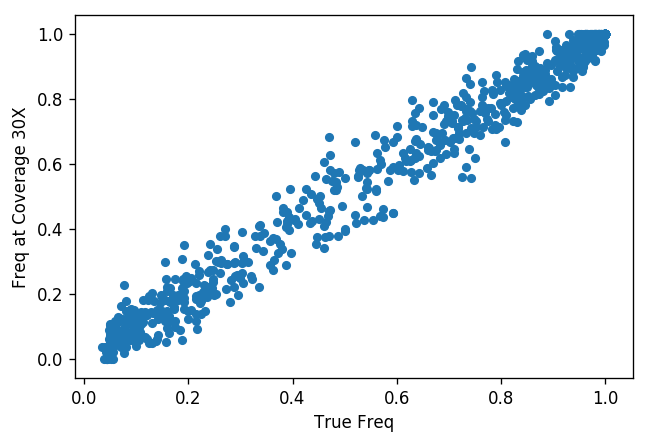

In [5]:
def sample(x,coverage=50):
    def sampleDepthX(X,cov):
        D= np.random.poisson(cov,X.size)
        C= np.array([np.random.binomial(d, x) for x, d in zip(X, D)])
        return C,D
    def sampleDepthXSeries(X,cov):
        C,D=sampleDepthX(X.values,cov)
        a=pd.DataFrame([C,D],columns=X.index,index=['C','D']).T
        return a
    return pd.concat([sampleDepthXSeries(x[j],coverage) for j in x.columns],1,keys=x.columns)

bfreq=b.stack()
b=sample(b)
a=sample(a)
pd.concat([bfreq,b.stack(level=0).C/b.stack(level=0).D],1,keys=['True Freq','Freq at Coverage 30X']).plot.scatter(x=0,y=1)

# Sampling Times Every 10 Gen

1       2       3       4       5       6       7       8       9       \
      C   D   C   D   C   D   C   D   C   D   C   D   C   D   C   D   C   D   
GEN                                                                           
0     1  43   1  48   4  54   4  54   3  63   1  41   4  62   3  54   2  49   
10   29  55  24  46  24  44  23  48  26  42  13  44  28  51  33  49  30  58   
20   32  52  29  42  30  47  36  60  26  50  32  58  35  53  32  52  30  46   
30   20  47  25  44  26  51  34  55  32  58  40  61  31  54  23  54  31  58   
40   29  45  44  64  33  56  41  70  24  44  31  71  35  50  31  55  29  53   

     10      
      C   D  
GEN          
0    11  51  
10   21  56  
20   25  48  
30   32  53  
40   25  46

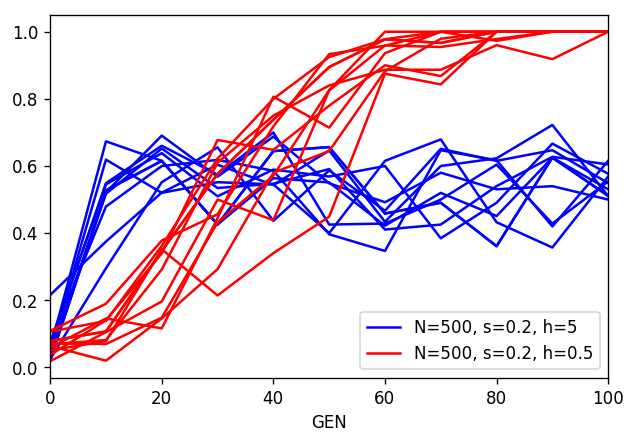

In [6]:
freq=lambda x:x.xs('C',1,1)/x.xs('D',1,1)
a=a.loc[T]
b=b.loc[T]
freq(a).plot(c='b',label='_nolegend_',legend=  False)
freq(a).iloc[:,0].plot(c='b',label='N=500, s=0.2, h=5',legend=not False)
freq(b).plot(c='r',label='_nolegend_',legend= False,ax=plt.gca())
freq(b).iloc[:,0].plot(c='r',label='N=500, s=0.2, h=0.5',ax=plt.gca(),legend=True);
a.head()

In [7]:
def CLEAR_INPUT(a):
    a=pd.DataFrame(a.unstack().reorder_levels([0,2,1]).sort_index()).T
    a.columns.names=['REP','GEN','READ']
    return a
a,b=map(CLEAR_INPUT,[a,b])
a

REP   1                                                                       \
GEN  0       10      20      30      40      50      60      70      80        
READ   C   D   C   D   C   D   C   D   C   D   C   D   C   D   C   D   C   D   
0      1  43  29  55  32  52  20  47  29  45  42  64  22  48  26  53  13  36   

REP                   2          ...  9           10                          \
GEN  90      100     0       10  ... 90  100     0       10      20      30    
READ   C   D   C   D   C   D   C ...   D   C   D   C   D   C   D   C   D   C   
0     35  56  23  45   1  48  24 ...  51  26  43  11  51  21  56  25  48  32   

REP                                                               
GEN      40      50      60      70      80      90      100      
READ   D   C   D   C   D   C   D   C   D   C   D   C   D   C   D  
0     53  25  46  42  65  23  53  30  50  38  61  39  54  25  49  

[1 rows x 220 columns]

# Estimate Parameter for Data with s=0.2, h=5

In [8]:
S = np.arange(-0.5, 1.001, 0.25)
liksa=mkv.HMM(eps=1e-2, CD=a, gridH=[0, 0.5, 1, 2, 5, 10], N=200, n=200, verbose=0,maxS=None).bruteForceLikelihoods(S)
print'Maximum Likelihood of s,h=',pd.concat(liksa,1).loc[0].argmax()

200 200


/home/arya/workspace/bio/CLEAR/Libs/Markov.py:237: RuntimeWarning: divide by zero encountered in vectorizedLog
  likes += utl.vectorizedLog(alpha.mean(1)) #it should be here


Maximum Likelihood of s,h= (0.25, 5.0)


# Estimate Parameter for Data with s=0.2, h=0.5

In [9]:
liksb=mkv.HMM(eps=1e-2, CD=b, gridH=[0, 0.5, 1, 2, 5, 10], N=200, n=200, verbose=0,maxS=None).bruteForceLikelihoods(S)
print'Maximum Likelihood of s,h=',pd.concat(liksb,1).loc[0].argmax()

200 200
Maximum Likelihood of s,h= (0.25, 0.5)
